IMDB Top 250 Movies dataset + srap 250 лучших фильмов Кинопоиск

In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

## 1. Соберите данные из двух разных источников (открытый датасет + веб-скрейпинг или API)

## Скачаем датасеты

### imdb 

Скачаем готовый датасет с каггл

In [2]:
import opendatasets as od
 
od.download(
    "https://www.kaggle.com/datasets/ashishjangra27/imdb-top-250-movies/movies.csv")

Skipping, found downloaded files in "./imdb-top-250-movies" (use force=True to force download)


In [3]:
imdb = pd.read_csv('imdb-top-250-movies/movies.csv')
imdb

,rank,id,name,year,imbd_votes,imdb_rating,certificate,duration,genre,cast_id,cast_name,director_id,director_name,writter_name,writter_id,img_link
0,1,tt0111161,The Shawshank Redemption,1994,2601152,9.3,A,142,Drama,"nm0000209,nm0000151,nm0348409,nm0006669,nm0000...","Tim Robbins,Morgan Freeman,Bob Gunton,William ...",nm0001104,Frank Darabont,"Stephen King,Frank Darabont","nm0000175,nm0001104",https://m.media-amazon.com/images/M/MV5BMDFkYT...
1,2,tt0068646,The Godfather,1972,1796656,9.2,A,175,"Crime,Drama","nm0000008,nm0000199,nm0001001,nm0000473,nm0144...","Marlon Brando,Al Pacino,James Caan,Diane Keato...",nm0000338,Francis Ford Coppola,"Mario Puzo,Francis Ford Coppola","nm0701374,nm0000338",https://m.media-amazon.com/images/M/MV5BM2MyNj...
2,3,tt0468569,The Dark Knight,2008,2572662,9.0,UA,152,"Action,Crime,Drama","nm0000288,nm0005132,nm0001173,nm0000323,nm0350...","Christian Bale,Heath Ledger,Aaron Eckhart,Mich...",nm0634240,Christopher Nolan,"Jonathan Nolan,Christopher Nolan,David S. Goyer","nm0634300,nm0634240,nm0275286",https://m.media-amazon.com/images/M/MV5BMTMxNT...
3,4,tt0071562,The Godfather Part II,1974,1237934,9.0,A,202,"Crime,Drama","nm0000199,nm0000134,nm0000380,nm0000473,nm0001...","Al Pacino,Robert De Niro,Robert Duvall,Diane K...",nm0000338,Francis Ford Coppola,"Francis Ford Coppola,Mario Puzo","nm0000338,nm0701374",https://m.media-amazon.com/images/M/MV5BMWMwMG...
4,5,tt0050083,12 Angry Men,1957,768548,9.0,U,96,"Crime,Drama","nm0000020,nm0002011,nm0000842,nm0275835,nm0550...","Henry Fonda,Lee J. Cobb,Martin Balsam,John Fie...",nm0001486,Sidney Lumet,Reginald Rose,nm0741627,https://m.media-amazon.com/images/M/MV5BMWU4N2...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,246,tt15097216,Jai Bhim,2021,190981,8.9,A,164,"Crime,Drama,Mystery","nm1421814,nm7934649,nm8904193,nm8135195,nm0695...","Suriya,Lijo Mol Jose,Manikandan K.,Rajisha Vij...",nm4377096,T.J. Gnanavel,"T.J. Gnanavel,Rajendra Sapre","nm4377096,nm13222819",https://m.media-amazon.com/images/M/MV5BYzgwOD...
246,247,tt0103639,Aladdin,1992,406751,8.0,U,90,"Animation,Adventure,Comedy","nm0918334,nm0000245,nm0488306,nm0293455,nm0919...","Scott Weinger,Robin Williams,Linda Larkin,Jona...","nm0166256,nm0615780","Ron Clements,John Musker","Ron Clements,John Musker,Ted Elliott","nm0166256,nm0615780,nm0254645",https://m.media-amazon.com/images/M/MV5BMTM5OT...
247,248,tt0083987,Gandhi,1982,228938,8.1,U,191,"Biography,Drama","nm0001426,nm0000024,nm0368990,nm0786022,nm0000...","Ben Kingsley,John Gielgud,Rohini Hattangadi,Ro...",nm0000277,Richard Attenborough,John Briley,nm0109300,https://m.media-amazon.com/images/M/MV5BY2Q2ND...
248,249,tt1454029,The Help,2011,451856,8.1,UA,146,Drama,"nm1297015,nm0205626,nm0818055,nm0397171,nm1567...","Emma Stone,Viola Davis,Octavia Spencer,Bryce D...",nm0853238,Tate Taylor,"Tate Taylor,Kathryn Stockett","nm0853238,nm3543826",https://m.media-amazon.com/images/M/MV5BOGVmZG...


### Кинопоиск 

Датасет с кинопоиска надо будет собрать самим

In [4]:
#!pip install git+https://github.com/odi1n/kinopoisk_dev --ignore-requires-python

In [5]:
import requests
from bs4 import BeautifulSoup

Нужно вставить свой токен

In [6]:
response = requests.get('https://api.kinopoisk.dev/v1.4/movie?top250!=None&limit=250&selectFields=id&selectFields=name&selectFields=enName&selectFields=type&selectFields=year&selectFields=movieLength&selectFields=isSeries&selectFields=ratingMpaa&selectFields=ageRating&selectFields=top250&selectFields=status&selectFields=rating&selectFields=votes&selectFields=genres&selectFields=countries&selectFields=releaseYears&lists=top250&sortField=top250&top250!=null&sortType=1&token=')

In [7]:
response

<Response [200]>

In [8]:
data = response.json()
data

{'docs': [{'status': None,
   'rating': {'kp': 8.216,
    'imdb': 7.8,
    'filmCritics': 0,
    'russianFilmCritics': 0,
    'await': None},
   'votes': {'kp': 58976,
    'imdb': 1116,
    'filmCritics': 0,
    'russianFilmCritics': 0,
    'await': 0},
   'movieLength': 103,
   'id': 42088,
   'type': 'movie',
   'name': 'Республика ШКИД',
   'year': 1966,
   'genres': [{'name': 'драма'}, {'name': 'комедия'}, {'name': 'семейный'}],
   'countries': [{'name': 'СССР'}],
   'enName': None,
   'ratingMpaa': 'g',
   'ageRating': 6,
   'top250': None,
   'isSeries': False},
  {'id': 3561,
   'type': 'movie',
   'name': 'Дневник памяти',
   'rating': {'kp': 8.247,
    'imdb': 7.8,
    'filmCritics': 5.7,
    'russianFilmCritics': 100,
    'await': None},
   'votes': {'kp': 363485,
    'imdb': 590025,
    'filmCritics': 181,
    'russianFilmCritics': 4,
    'await': 0},
   'year': 2004,
   'genres': [{'name': 'драма'}, {'name': 'мелодрама'}],
   'countries': [{'name': 'США'}],
   'enName': Non

In [9]:
df = pd.DataFrame(data['docs'])

In [10]:
df.sort_values('top250')

,status,rating,votes,movieLength,id,type,name,year,genres,countries,enName,ratingMpaa,ageRating,top250,isSeries,releaseYears
9,None,"{'kp': 9.074, 'imdb': 8.6, 'filmCritics': 6.8,...","{'kp': 930256, 'imdb': 1365233, 'filmCritics':...",189,435,movie,Зеленая миля,1999,"[{'name': 'драма'}, {'name': 'фэнтези'}, {'nam...",[{'name': 'США'}],None,r,16.0,1.0,False,NaN
10,None,"{'kp': 9.109, 'imdb': 9.3, 'filmCritics': 8.4,...","{'kp': 983143, 'imdb': 2816633, 'filmCritics':...",142,326,movie,Побег из Шоушенка,1994,[{'name': 'драма'}],[{'name': 'США'}],None,r,16.0,2.0,False,NaN
11,None,"{'kp': 8.921, 'imdb': 8.8, 'filmCritics': 7.5,...","{'kp': 865138, 'imdb': 2186445, 'filmCritics':...",142,448,movie,Форрест Гамп,1994,"[{'name': 'драма'}, {'name': 'комедия'}, {'nam...",[{'name': 'США'}],None,pg13,18.0,3.0,False,NaN
12,None,"{'kp': 8.815, 'imdb': 8.5, 'filmCritics': 6.8,...","{'kp': 1741628, 'imdb': 901255, 'filmCritics':...",112,535341,movie,1+1,2011,"[{'name': 'драма'}, {'name': 'комедия'}, {'nam...",[{'name': 'Франция'}],None,r,18.0,4.0,False,NaN
13,None,"{'kp': 8.722, 'imdb': 8.4, 'filmCritics': 8.3,...","{'kp': 643144, 'imdb': 539244, 'filmCritics': ...",105,679486,cartoon,Тайна Коко,2017,"[{'name': 'мультфильм'}, {'name': 'фэнтези'}, ...","[{'name': 'США'}, {'name': 'Япония'}]",None,pg,12.0,5.0,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,None,"{'kp': 7.969, 'imdb': 7.7, 'filmCritics': 8, '...","{'kp': 79345, 'imdb': 90941, 'filmCritics': 18...",126,693969,anime,Ветер крепчает,2013,"[{'name': 'аниме'}, {'name': 'мультфильм'}, {'...",[{'name': 'Япония'}],The Wind Rises,pg13,12.0,NaN,False,NaN
5,None,"{'kp': 8.099, 'imdb': 6.9, 'filmCritics': 0, '...","{'kp': 52335, 'imdb': 1823, 'filmCritics': 0, ...",116,1032308,movie,Как прогулять школу с пользой,2017,"[{'name': 'драма'}, {'name': 'комедия'}, {'nam...",[{'name': 'Франция'}],None,g,6.0,NaN,False,NaN
6,None,"{'kp': 8.187, 'imdb': 8.5, 'filmCritics': 9.3,...","{'kp': 70921, 'imdb': 288138, 'filmCritics': 4...",88,8219,anime,Могила светлячков,1988,"[{'name': 'аниме'}, {'name': 'мультфильм'}, {'...",[{'name': 'Япония'}],Tombstone for Fireflies,None,12.0,NaN,False,NaN
7,None,"{'kp': 8.002, 'imdb': 7.3, 'filmCritics': 0, '...","{'kp': 180874, 'imdb': 2554, 'filmCritics': 0,...",87,43104,movie,Полосатый рейс,1961,"[{'name': 'комедия'}, {'name': 'семейный'}, {'...",[{'name': 'СССР'}],None,None,12.0,NaN,False,NaN


Замечание:

фильмы скачались корректно, но, например, у Ворошиловского стрелка нет рейтинга в топ 250, но на реальном сайте он занимает 240 место

Удалим пропуски в рейтинге

In [11]:
df = df[df['top250'].notna()]

In [12]:
df

,status,rating,votes,movieLength,id,type,name,year,genres,countries,enName,ratingMpaa,ageRating,top250,isSeries,releaseYears
9,None,"{'kp': 9.074, 'imdb': 8.6, 'filmCritics': 6.8,...","{'kp': 930256, 'imdb': 1365233, 'filmCritics':...",189,435,movie,Зеленая миля,1999,"[{'name': 'драма'}, {'name': 'фэнтези'}, {'nam...",[{'name': 'США'}],None,r,16.0,1.0,False,NaN
10,None,"{'kp': 9.109, 'imdb': 9.3, 'filmCritics': 8.4,...","{'kp': 983143, 'imdb': 2816633, 'filmCritics':...",142,326,movie,Побег из Шоушенка,1994,[{'name': 'драма'}],[{'name': 'США'}],None,r,16.0,2.0,False,NaN
11,None,"{'kp': 8.921, 'imdb': 8.8, 'filmCritics': 7.5,...","{'kp': 865138, 'imdb': 2186445, 'filmCritics':...",142,448,movie,Форрест Гамп,1994,"[{'name': 'драма'}, {'name': 'комедия'}, {'nam...",[{'name': 'США'}],None,pg13,18.0,3.0,False,NaN
12,None,"{'kp': 8.815, 'imdb': 8.5, 'filmCritics': 6.8,...","{'kp': 1741628, 'imdb': 901255, 'filmCritics':...",112,535341,movie,1+1,2011,"[{'name': 'драма'}, {'name': 'комедия'}, {'nam...",[{'name': 'Франция'}],None,r,18.0,4.0,False,NaN
13,None,"{'kp': 8.722, 'imdb': 8.4, 'filmCritics': 8.3,...","{'kp': 643144, 'imdb': 539244, 'filmCritics': ...",105,679486,cartoon,Тайна Коко,2017,"[{'name': 'мультфильм'}, {'name': 'фэнтези'}, ...","[{'name': 'США'}, {'name': 'Япония'}]",None,pg,12.0,5.0,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,None,"{'kp': 8.184, 'imdb': 8, 'filmCritics': 0, 'ru...","{'kp': 208496, 'imdb': 5851, 'filmCritics': 0,...",94,46089,movie,Берегись автомобиля,1966,"[{'name': 'криминал'}, {'name': 'комедия'}, {'...",[{'name': 'СССР'}],None,None,12.0,243.0,False,NaN
246,None,"{'kp': 8.187, 'imdb': 8.1, 'filmCritics': 0, '...","{'kp': 408808, 'imdb': 13053, 'filmCritics': 0...",184,77331,movie,"Ирония судьбы, или С легким паром!",1975,"[{'name': 'мелодрама'}, {'name': 'комедия'}]",[{'name': 'СССР'}],None,None,6.0,245.0,False,NaN
247,None,"{'kp': 8.091, 'imdb': 8, 'filmCritics': 8, 'ru...","{'kp': 417182, 'imdb': 15788, 'filmCritics': 1...",116,808639,movie,Дурак,2014,[{'name': 'драма'}],[{'name': 'Россия'}],None,None,18.0,246.0,False,NaN
248,None,"{'kp': 8.069, 'imdb': 7.6, 'filmCritics': 0, '...","{'kp': 200942, 'imdb': 6162, 'filmCritics': 0,...",104,46421,movie,Невероятные приключения итальянцев в России,1973,"[{'name': 'комедия'}, {'name': 'приключения'},...","[{'name': 'СССР'}, {'name': 'Италия'}]",None,None,12.0,247.0,False,NaN


## 2. Проведите их агрегацию, создав единый датасет. 

Оставим только нужные колонки из первого датасета

In [13]:
imdb = imdb[['rank', 'name','year', 'imbd_votes', 'imdb_rating']]
imdb.head(5)

,rank,name,year,imbd_votes,imdb_rating
0,1,The Shawshank Redemption,1994,2601152,9.3
1,2,The Godfather,1972,1796656,9.2
2,3,The Dark Knight,2008,2572662,9.0
3,4,The Godfather Part II,1974,1237934,9.0
4,5,12 Angry Men,1957,768548,9.0


Оставим нужные колонки из второго датасета

In [14]:
kinopoisk = df[['top250', 'name', 'enName', 'year', 'votes', 'rating']]
kinopoisk.head(5)

,top250,name,enName,year,votes,rating
9,1.0,Зеленая миля,None,1999,"{'kp': 930256, 'imdb': 1365233, 'filmCritics':...","{'kp': 9.074, 'imdb': 8.6, 'filmCritics': 6.8,..."
10,2.0,Побег из Шоушенка,None,1994,"{'kp': 983143, 'imdb': 2816633, 'filmCritics':...","{'kp': 9.109, 'imdb': 9.3, 'filmCritics': 8.4,..."
11,3.0,Форрест Гамп,None,1994,"{'kp': 865138, 'imdb': 2186445, 'filmCritics':...","{'kp': 8.921, 'imdb': 8.8, 'filmCritics': 7.5,..."
12,4.0,1+1,None,2011,"{'kp': 1741628, 'imdb': 901255, 'filmCritics':...","{'kp': 8.815, 'imdb': 8.5, 'filmCritics': 6.8,..."
13,5.0,Тайна Коко,None,2017,"{'kp': 643144, 'imdb': 539244, 'filmCritics': ...","{'kp': 8.722, 'imdb': 8.4, 'filmCritics': 8.3,..."


Данные кинопоиска надо почистить

In [15]:
kinopoisk['votes'] = kinopoisk['votes'].apply(lambda x: x['kp'])
kinopoisk['rating'] = kinopoisk['rating'].apply(lambda x: x['kp'])

In [16]:
kinopoisk.head(5)

,top250,name,enName,year,votes,rating
9,1.0,Зеленая миля,None,1999,930256,9.074
10,2.0,Побег из Шоушенка,None,1994,983143,9.109
11,3.0,Форрест Гамп,None,1994,865138,8.921
12,4.0,1+1,None,2011,1741628,8.815
13,5.0,Тайна Коко,None,2017,643144,8.722


Всего у 41 фильма есть английское название

In [17]:
kinopoisk['enName'].notna().sum()

41

In [18]:
kinopoisk[kinopoisk['enName'].notna()].head(5)

,top250,name,enName,year,votes,rating
15,6.0,Властелин колец: Возвращение короля,The Return of the King,2003,558511,8.657
18,9.0,Унесённые призраками,Sen and Chihiro's Spiriting Away,2001,535746,8.492
21,12.0,Властелин колец: Братство Кольца,LOTR,2001,622091,8.605
22,14.0,Властелин колец: Две крепости,The Two Towers,2002,547698,8.601
33,24.0,ВАЛЛ·И,WALL-E,2008,627153,8.361


Если у фильма есть английское название, то в колонке Name пишем его

In [19]:
non_null_indices = kinopoisk['enName'].notnull()
non_null_indices

9      False
10     False
11     False
12     False
13     False
       ...  
245    False
246    False
247    False
248    False
249    False
Name: enName, Length: 241, dtype: bool

In [20]:
kinopoisk.loc[non_null_indices, 'name'] = kinopoisk.loc[non_null_indices, 'enName']

In [21]:
kinopoisk[kinopoisk['enName'].notna()].head(5)

,top250,name,enName,year,votes,rating
15,6.0,The Return of the King,The Return of the King,2003,558511,8.657
18,9.0,Sen and Chihiro's Spiriting Away,Sen and Chihiro's Spiriting Away,2001,535746,8.492
21,12.0,LOTR,LOTR,2001,622091,8.605
22,14.0,The Two Towers,The Two Towers,2002,547698,8.601
33,24.0,WALL-E,WALL-E,2008,627153,8.361


In [22]:
kinopoisk = kinopoisk.drop(columns=['enName'])
kinopoisk.head(5)

,top250,name,year,votes,rating
9,1.0,Зеленая миля,1999,930256,9.074
10,2.0,Побег из Шоушенка,1994,983143,9.109
11,3.0,Форрест Гамп,1994,865138,8.921
12,4.0,1+1,2011,1741628,8.815
13,5.0,Тайна Коко,2017,643144,8.722


Переименуем колонки 

In [23]:
kinopoisk = kinopoisk.rename(columns={'top250':'rank'})
imdb = imdb.rename(columns={'imbd_votes':'votes', 'imdb_rating':'rating'})

In [24]:
kinopoisk['site'] = 'kinopoisk'
imdb['site'] = 'imdb'

In [25]:
total_data = pd.concat([kinopoisk, imdb], ignore_index=True)

In [26]:
total_data

,rank,name,year,votes,rating,site
0,1.0,Зеленая миля,1999,930256,9.074,kinopoisk
1,2.0,Побег из Шоушенка,1994,983143,9.109,kinopoisk
2,3.0,Форрест Гамп,1994,865138,8.921,kinopoisk
3,4.0,1+1,2011,1741628,8.815,kinopoisk
4,5.0,Тайна Коко,2017,643144,8.722,kinopoisk
...,...,...,...,...,...,...
486,246.0,Jai Bhim,2021,190981,8.900,imdb
487,247.0,Aladdin,1992,406751,8.000,imdb
488,248.0,Gandhi,1982,228938,8.100,imdb
489,249.0,The Help,2011,451856,8.100,imdb


## 3. Проведите разведывательный анализ данных (EDA) 

In [27]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rank    491 non-null    float64
 1   name    491 non-null    object 
 2   year    491 non-null    int64  
 3   votes   491 non-null    int64  
 4   rating  491 non-null    float64
 5   site    491 non-null    object 
dtypes: float64(2), int64(2), object(2)
memory usage: 23.1+ KB


In [28]:
total_data.describe()

,rank,year,votes,rating
count,491.000000,491.000000,4.910000e+02,491.000000
mean,122.741344,1991.761711,5.076427e+05,8.280332
std,71.163252,22.244886,4.239310e+05,0.238465
min,1.000000,1921.000000,1.938900e+04,7.723000
25%,62.500000,1979.000000,1.800850e+05,8.100000
50%,121.000000,1997.000000,3.949000e+05,8.214000
75%,184.000000,2009.000000,7.024125e+05,8.400000
max,250.000000,2023.000000,2.601152e+06,9.300000


Year: средний год выпуска фильмов из двух топов - 1991.76, причем половина фильмов выпущены раньше 1997 года, другая половина - позже

Votes: Средняя количество проголосовавших за фильм 507642, причем за половину фильмов проголосовало меньше 394900 человек, за другую половину больше. 

Rating: Средняя оценка в топе 8.28, минимальная оценка фильма из топа - 7.72, отклонение всего 0.24

In [29]:
total_data.groupby('site')['year'].describe()

,count,mean,std,min,25%,50%,75%,max
site,,,,,,,,
imdb,250.0,1986.45600,25.214423,1921.0,1966.25,1994.0,2006.75,2022.0
kinopoisk,241.0,1997.26556,17.056891,1939.0,1986.00,2001.0,2010.00,2023.0


Видим, что на кинопоиске фильмы "помоложе", и отклонение меньше

In [30]:
total_data.groupby('site')['votes'].describe()

,count,mean,std,min,25%,50%,75%,max
site,,,,,,,,
imdb,250.0,620428.732000,501411.723453,28680.0,209944.75,482315.0,935673.0,2601152.0
kinopoisk,241.0,390644.709544,281221.017246,19389.0,160140.00,332413.0,556584.0,1741628.0


На сайте imdb голосуют больше людей, чем на кинопоиске

In [31]:
total_data.groupby('site')['rating'].describe()

,count,mean,std,min,25%,50%,75%,max
site,,,,,,,,
imdb,250.0,8.311200,0.229445,8.000,8.100,8.250,8.400,9.300
kinopoisk,241.0,8.248311,0.243842,7.723,8.076,8.214,8.384,9.109


Рейтинги сильно не отличаются. Минимальное значение рейтинга на imdb больше на 0.277 и максимальное значение больше на 0.191

In [32]:
total_data.isna().sum()

rank      0
name      0
year      0
votes     0
rating    0
site      0
dtype: int64

Пустых значений нет

Топ-5 фильмов из обоих рейтингов

In [33]:
total_data[total_data['rank'] <= 5]

,rank,name,year,votes,rating,site
0,1.0,Зеленая миля,1999,930256,9.074,kinopoisk
1,2.0,Побег из Шоушенка,1994,983143,9.109,kinopoisk
2,3.0,Форрест Гамп,1994,865138,8.921,kinopoisk
3,4.0,1+1,2011,1741628,8.815,kinopoisk
4,5.0,Тайна Коко,2017,643144,8.722,kinopoisk
5,5.0,Список Шиндлера,1993,491093,8.844,kinopoisk
241,1.0,The Shawshank Redemption,1994,2601152,9.300,imdb
242,2.0,The Godfather,1972,1796656,9.200,imdb
243,3.0,The Dark Knight,2008,2572662,9.000,imdb
244,4.0,The Godfather Part II,1974,1237934,9.000,imdb


Топ 5 отличаются полностью

Посмотрим, сколько фильмов из рейтинга кинопоиска присутствуют в рейтинге imdb

! английское название у нас имеет 41 фильм

In [34]:
total_data[total_data['name'].duplicated()]

,rank,name,year,votes,rating,site


Проверим на имходных данных, убедимся, что пересечений не было 

In [35]:
pd.Series(list(set(kinopoisk['name']).intersection(set(imdb['name']))))

Series([], dtype: object)

Построим круговую диаграмму по годам выпуска фильмов

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [37]:
_1921to1940, _1941to1960, _1961to1980, _1981to1900, _1901to1923 = 0, 0, 0, 0, 0

for i in total_data['year']:
    if i > 1920 and i <= 1940:
        _1921to1940 += 1
    elif i > 1940 and i <= 1960:
        _1941to1960 += 1
    elif i > 1960 and i <= 1980:
        _1961to1980 += 1
    elif i > 1980 and i <= 2000:
        _1981to1900 += 1
    else: 
        _1901to1923 += 1

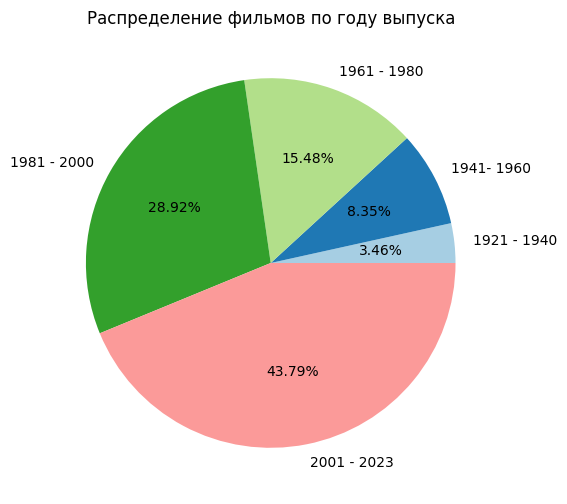

In [38]:
data = [_1921to1940, _1941to1960, _1961to1980, _1981to1900, _1901to1923]
label = ['1921 - 1940', '1941- 1960', '1961 - 1980', '1981 - 2000', '2001 - 2023']
plt.figure(figsize=(12,6))
plt.pie(data,labels=label,colors=sns.color_palette('Paired'),autopct='%.2f%%')
plt.title("Распределение фильмов по году выпуска")
plt.show()

Самые оцениваемые фильмы

In [39]:
total_data[total_data['site'] == 'imdb'].sort_values(by='votes', ascending=False).head(10)

,rank,name,year,votes,rating,site
241,1.0,The Shawshank Redemption,1994,2601152,9.3,imdb
243,3.0,The Dark Knight,2008,2572662,9.0,imdb
253,13.0,Inception,2010,2282447,8.8,imdb
252,12.0,Fight Club,1999,2048759,8.8,imdb
251,11.0,Forrest Gump,1994,2009640,8.8,imdb
248,8.0,Pulp Fiction,1994,1993957,8.9,imdb
256,16.0,The Matrix,1999,1867547,8.7,imdb
249,9.0,The Lord of the Rings: The Fellowship of the Ring,2001,1807565,8.8,imdb
242,2.0,The Godfather,1972,1796656,9.2,imdb
247,7.0,The Lord of the Rings: The Return of the King,2003,1786498,9.0,imdb


In [40]:
total_data[total_data['site'] == 'kinopoisk'].sort_values(by='votes', ascending=False).head(10)

,rank,name,year,votes,rating,site
3,4.0,1+1,2011,1741628,8.815,kinopoisk
32,32.0,Джентльмены,2019,1533714,8.562,kinopoisk
79,78.0,Волк с Уолл-стрит,2013,1192432,7.993,kinopoisk
50,51.0,Брат,1997,1161755,8.305,kinopoisk
44,44.0,Home Alone 1,1990,1018003,8.275,kinopoisk
165,163.0,Project 880465wtgsdtg,2009,1014540,7.972,kinopoisk
1,2.0,Побег из Шоушенка,1994,983143,9.109,kinopoisk
189,187.0,Достать ножи,2019,959202,8.103,kinopoisk
34,33.0,Начало,2010,937915,8.663,kinopoisk
11,12.0,Иван Васильевич меняет профессию,1973,934223,8.786,kinopoisk


## 4. Постройте базовые визуализации для основных признаков с учетом разметки данных. 

### Равним распределение по году выпуска 

In [41]:
kinopoisk_1921to1940, kinopoisk_1941to1960, kinopoisk_1961to1980, kinopoisk_1981to1900, kinopoisk_1901to1923 = 0, 0, 0, 0, 0

for i in total_data[total_data['site']=='kinopoisk']['year']:
    if i > 1920 and i <= 1940:
        kinopoisk_1921to1940 += 1
    elif i > 1940 and i <= 1960:
        kinopoisk_1941to1960 += 1
    elif i > 1960 and i <= 1980:
        kinopoisk_1961to1980 += 1
    elif i > 1980 and i <= 2000:
        kinopoisk_1981to1900 += 1
    else: 
        kinopoisk_1901to1923 += 1

In [42]:
imdb_1921to1940, imdb_1941to1960, imdb_1961to1980, imdb_1981to1900, imdb_1901to1923 = 0, 0, 0, 0, 0

for i in total_data[total_data['site']=='imdb']['year']:
    if i > 1920 and i <= 1940:
        imdb_1921to1940 += 1
    elif i > 1940 and i <= 1960:
        imdb_1941to1960 += 1
    elif i > 1960 and i <= 1980:
        imdb_1961to1980 += 1
    elif i > 1980 and i <= 2000:
        imdb_1981to1900 += 1
    else: 
        imdb_1901to1923 += 1

In [43]:
data1 = [kinopoisk_1921to1940, kinopoisk_1941to1960, kinopoisk_1961to1980, kinopoisk_1981to1900, kinopoisk_1901to1923]
data2 = [imdb_1921to1940, imdb_1941to1960, imdb_1961to1980, imdb_1981to1900, imdb_1901to1923]
label = ['1921 - 1940', '1941- 1960', '1961 - 1980', '1981 - 2000', '2001 - 2023']

In [44]:
#pd.Series(data1, index = label).plot(kind='bar')

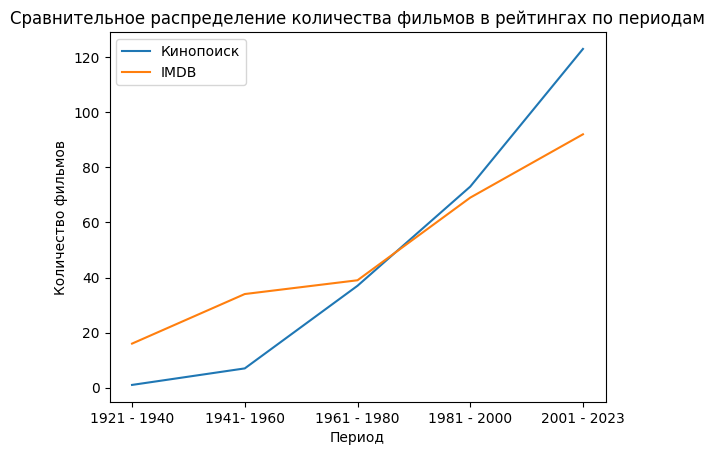

In [45]:
plt.plot(label, data1, label='Кинопоиск')
plt.plot(label, data2, label='IMDB')
plt.xlabel('Период')
plt.ylabel('Количество фильмов')
plt.title('Сравнительное распределение количества фильмов в рейтингах по периодам')
plt.legend()
plt.show()

Как мы отмечали выше, на кинопоиске меньше старых фильмов и больше новых фильмов. Теперь это видно на графике.

### Посмотрим распределение оценок 

In [46]:
tmp_data_rating = total_data[['site','rating']].copy()
tmp_data_rating['rating'] = tmp_data_rating['rating'].apply(np.int64)

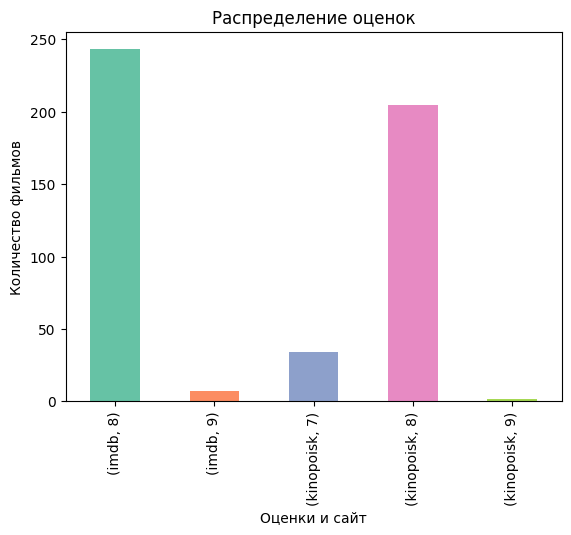

In [47]:
tmp_data_rating.groupby(['site', 'rating'])['rating'].count().plot(kind = 'bar', color = sns.color_palette('Set2'))
plt.xlabel('Оценки и сайт')
plt.ylabel('Количество фильмов')
plt.title("Распределение оценок")
plt.show()

На imdb чтобы попасть в рейтинг, надо набрать от 8 рейтинг. На кинопоиске оценки начинаются с 7.

### Общее количество голосов в каждой группе 

In [48]:
total_data.groupby(['site'])['votes'].sum()

site
imdb         155107183
kinopoisk     94145375
Name: votes, dtype: int64

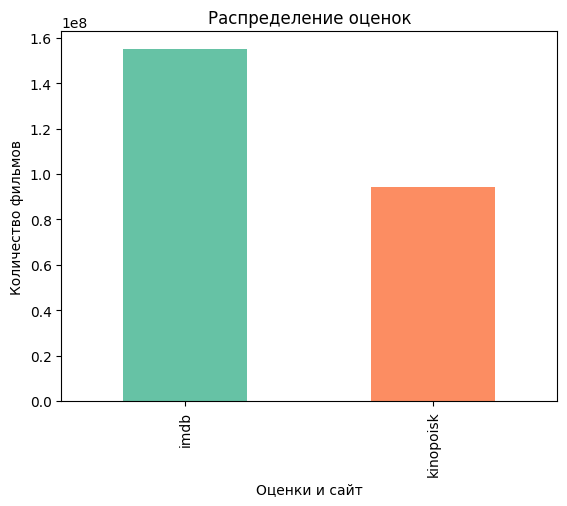

In [49]:
total_data.groupby(['site'])['votes'].sum().plot(kind = 'bar', color = sns.color_palette('Set2'))
plt.xlabel('Оценки и сайт')
plt.ylabel('Количество фильмов')
plt.title("Распределение оценок")
plt.show()

Количество колосов на imdb в 1.65 раз больше, чем на кинопоиске

## 5. Опишите возможные применения этих данных в контексте машинного обучения. 

In [50]:
total_data.sort_values(by='votes', ascending=False).head(5)

,rank,name,year,votes,rating,site
241,1.0,The Shawshank Redemption,1994,2601152,9.3,imdb
243,3.0,The Dark Knight,2008,2572662,9.0,imdb
253,13.0,Inception,2010,2282447,8.8,imdb
252,12.0,Fight Club,1999,2048759,8.8,imdb
251,11.0,Forrest Gump,1994,2009640,8.8,imdb


Эти данных могут работать для задачи классификации (бинарной) МО - определять, с какого сайта взяты отзывы.

Также для задачи регрессии - зная фильм, год выпуска, количество проголосовавших можно предсказать оценку этого фильма.

В датасете imdb есть еще данные о режиссерах, сценаристах, на этих данных также можно предсказывать рейтинг фильма (а для кинопроизводства это деньги)

С помощью апи кинопоска можно собрать страну производства фильма, результаты сборов, бюджет фильма, список режиссеров, операторов, актеров, награды актеров, очень много данных, много задач предсказания можно решить (кто работает над фильмом - предсказать сборы, предсказать рейтинг; зная рейтинг, жанр и актеров - предсказать страну производства и режиссер и т.д.)